# Sentiment Analysis of Reddit Posts: Project Overview


In the dynamic realm of online discourse, our project leverages AI and machine learning techniques for sentiment analysis on Reddit posts, offering valuable insights into user opinions and trends. The dataset, sourced through web scraping or API utilization, encompasses diverse user-generated content, including post titles, comments, scores, and user information.

The initial phase involves meticulous data processing and cleaning, employing techniques such as tokenization and text preprocessing to refine the dataset's quality. Subsequently, we employ sentiment analysis libraries in Python, such as VADER, to discern sentiments expressed in the posts. This analytical process unveils patterns, trends, and correlations in the emotional tone of Reddit users.

For a comprehensive understanding, our project integrates result visualization techniques using popular Python libraries like Matplotlib and Seaborn. Sentiment distribution, average scores per sentiment category, and time trends of posts are graphically represented, providing clear and insightful visualizations. User engagement analysis based on the first letter of usernames and the creation of word clouds offers nuanced perspectives on user interactions and prevalent themes in the Reddit dataset.

### Objective:
The goal of this project is to perform sentiment analysis on any subreddit posts. Here, I have used NFTMarketplace subreddit for Sentiment analysis that involves determining the sentiment or emotional tone expressed in textual data, in this case, the comments on Reddit posts. 
* **You can use any subreddit of your desired choice**

### Sentiment Analysis : 
It involves interpreting and categorizing emotions (positive, negative) within textual data through text analysis techniques. Sentiment analysis empowers organizations to discern public sentiment towards specific words or topics.

 ## Data Acquisition:
 * **Using PRAW Library:**
For this project, the data was acquired from Reddit using the PRAW (Python Reddit API Wrapper) library. PRAW allows seamless interaction with the Reddit API, enabling the extraction of post titles, URLs, top comments, and associated scores. The dataset was collected from various subreddits related to NFTs and cryptocurrency.

In [80]:
# Import the 'praw' library for interacting with the Reddit API
import praw
# Import the 'csv' module for reading and writing CSV files
import csv


## Reddit API Credentials:
**To perform sentiment analysis on Reddit, you need to obtain API credentials by following these steps:**		

1. **Create a Reddit Developer Account**

   Visit the [Reddit Apps](https://www.reddit.com/prefs/apps) page and log in with your Reddit account. If you don&rsquo;t have one, you&rsquo;ll need to create a Reddit account.

2. **Create a New App**

   - Scroll down to the "Developed Applications" section.
   - Click on the "Create App" or "Create Another App" button.

3. **Configure Your App**

   - **name**: Choose a name for your application.
   - **App type**: Select "script."
   - **description**: Provide a brief description of your application.
   - **permissions**: For script-type apps, you don&rsquo;t need any specific permissions.

4. **Note Down Your Credentials**

   After creating the app, you will see a page with your app details. Note down the following:
   - **client_id**: This is your app&rsquo;s client ID.
   - **client_secret**: This is your app&rsquo;s client secret.

5. **Configure Your Python Script**

   Use the obtained `client_id` and `client_secret` in your Python script:

   import praw

### Configure your Reddit API credentials
reddit = praw.Reddit(
    client_id='YOUR_CLIENT_ID',
    client_secret='YOUR_CLIENT_SECRET',
    user_agent='YOUR_USER_AGENT'
)

##### Replace 'YOUR_CLIENT_ID' and 'YOUR_CLIENT_SECRET' with the values you obtained in step 4.
Now, with the proper API credentials, you can perform sentiment analysis on Reddit data using the PRAW library or any other suitable tool.
Here, I have filled a sample Reddit API Credentials for your convenience.

In [76]:
# Configure your Reddit API credentials
reddit = praw.Reddit(
    client_id='PZvbq3YzCVLz6g9pvmOcMw',
    client_secret='j0VDYpuWFaFceb9yi08FhzXhn4ho6A',
    user_agent='stackupBounty'
)

In [181]:
# Define the subreddit you want to scrape
subreddit_name = 'NFTMarketplace'  # Change to your desired subreddit

In [182]:
# Get the top posts from the subreddit
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.top(limit=None)  # You can change the limit as needed

In [183]:
# Create a CSV file for storing the data with UTF-8 encoding
with open('reddit_dataset.csv', 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Post Title', 'Post URL', 'Top Comment', 'Top Comment Score'])

    # Iterate through the top posts and get their top comment
    for post in top_posts:
        post_title = post.title
        post_url = post.url

        # Get the top comment
        top_comment = None
        top_score = 0
        for comment in post.comments:
            if comment.score > top_score:
                top_score = comment.score
                top_comment = comment

        if top_comment:
            top_comment_text = top_comment.body
            csv_writer.writerow([post_title, post_url, top_comment_text, top_score])
        else:
            csv_writer.writerow([post_title, post_url, 'No top comment found', 0])

print("Data has been saved to 'reddit_dataset.csv'")

Data has been saved to 'reddit_dataset.csv'


## Importing Libraries and Reading Data

### Libraries Overview:

- **pandas (`import pandas as pd`):** Used for data manipulation and analysis. It provides data structures like DataFrames, which are effective for handling structured data.

- **numpy (`import numpy as np`):** Used for numerical operations on arrays and matrices. It complements pandas in handling numerical data efficiently.

- **matplotlib (`import matplotlib.pyplot as plt`):** A popular data visualization library for creating static, animated, and interactive plots.

- **seaborn (`import seaborn as sns`):** Built on top of matplotlib, seaborn enhances the visual appeal of plots and provides additional functionalities for statistical visualization.

- **nltk (`import nltk`):** The Natural Language Toolkit is used for natural language processing tasks, including tokenization, stemming, and sentiment analysis.

- **emoji (`import emoji`):** A Python module for dealing with emojis, useful in emoji-related text processing.

- **string (`import string`):** Provides common string operations and character sets, helpful in text preprocessing.

- **re (`import re`):** The regular expression module in Python, used for pattern matching and string manipulation.

In [226]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import emoji
import string
import re

## Read the dataset into a DataFrame
The dataset obtained from Reddit is stored in a CSV file ('reddit_dataset.csv'). Pandas is used to read this dataset into a DataFrame for further analysis.


In [228]:
df = pd.read_csv('reddit_dataset.csv')
print(df.shape)

(997, 4)


## DataFrame Structure:
The DataFrame contains information about Reddit posts, including post title, post URL, top comment, and the score of the top comment. Each row represents a different Reddit post.

In [229]:
df.head()

,Post Title,Post URL,Top Comment,Top Comment Score
0,🦹‍♀💣 Bomberbabes | Reversed BAYC marketing str...,https://www.reddit.com/r/NFTMarketplace/commen...,Good project,1
1,Gym Network | Earn Profits + Rewards + Affilia...,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
2,Why Shinsekai Is The Uniquest NFT Ever,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
3,HUGE NEWS!!! ARB ROUND 2,https://i.redd.it/scd7foprmr5b1.png,#SCAM! THEY HAVE POSTED ON EVERY CRYPTO FORUM ...,1
4,I think Decentraland will flip Sandbox in floo...,https://link.poly.market/decentraland-vs-sandb...,0x20b3e84ea42ffbb9c1fbced052c17c4706e76a04\n\n...,1


## Data Processing and Cleaning:
The data cleaning process involves handling missing values, removing unwanted characters, and preparing the text data for sentiment analysis. The NLTK library is employed for text processing tasks such as removing emojis, punctuation, and stopwords, as well as tokenization.

In [230]:
# Function to remove emojis from text
def remove_emojis(text):
    cleaned_text = emoji.demojize(text)
    cleaned_text = cleaned_text.replace(":", "")  # Remove colons used by emoji codes
    return cleaned_text

In [231]:
# Function to remove specific text from a given string
def remove_text(text, text_to_remove):
    return text.replace(text_to_remove, '')

In [232]:
# Function to remove punctuation, links, and HTML tags from text
def remove_puncs_and_link(text):
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    return text

In [233]:
# Example usage of the functions
example = df['Top Comment'][50]
example

'Lovely post! #Popcult is the solid NFT project of the moment!'

## Tokenization:
Tokenization involves breaking down text into individual words. The NLTK library's punkt tokenizer is used for this purpose.

In [234]:
# Download the punkt tokenizer from NLTK
nltk.download('punkt')  # Download the punkt tokenizer

def tokenize_text(text):
    # Tokenize the input text into words
    tokens = nltk.word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [235]:
# Tokenize the example text
tokens = nltk.word_tokenize(example)
tokens[:10]

['Lovely', 'post', '!', '#', 'Popcult', 'is', 'the', 'solid', 'NFT', 'project']

## Removing Stopwords:
Stopwords are common words (e.g., "and," "the") that are often removed from text during natural language processing to focus on meaningful words.

In [236]:
from nltk.corpus import stopwords
# Download English stopwords from NLTK

nltk.download('stopwords')
# Function to remove stopwords from text

def remove_stopwords(text):
    # Tokenize the input text into words
    words = nltk.word_tokenize(text)

    # Get the list of English stopwords from NLTK
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tokenized words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a text
    filtered_text = ' '.join(filtered_words)

    return filtered_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part-of-Speech Tagging:
Part-of-speech tagging assigns a part of speech (e.g., noun, verb) to each word in a sentence.

In [237]:
from nltk import pos_tag
# Download the averaged perceptron tagger from NLTK

nltk.download('averaged_perceptron_tagger')
# Part-of-speech tagging using NLTK

tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Lovely', 'RB'),
 ('post', 'NN'),
 ('!', '.'),
 ('#', '#'),
 ('Popcult', 'NNP'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('solid', 'JJ'),
 ('NFT', 'NNP'),
 ('project', 'NN')]

## Named Entity Recognition (NER):
Named Entity Recognition identifies entities such as names, organizations, and locations in text.

In [238]:
# Download necessary resources for named entity recognition

nltk.download('maxent_ne_chunker')
nltk.download('words')
# Perform named entity recognition

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Lovely/RB
  post/NN
  !/.
  #/#
  (PERSON Popcult/NNP)
  is/VBZ
  the/DT
  solid/JJ
  (ORGANIZATION NFT/NNP)
  project/NN
  of/IN
  the/DT
  moment/NN
  !/.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Text Stemming:
Stemming reduces words to their root or base form. The Porter stemmer from NLTK is applied in this case.

In [239]:
from nltk.stem import PorterStemmer

def stem_text(text):
    # Tokenize the input text into words
    tokens = nltk.word_tokenize(text)

    # Initialize the Porter stemmer
    stemmer = PorterStemmer()

    # Apply stemming to each token and store the result in a list
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join the stemmed tokens back into a text
    stemmed_text = ' '.join(stemmed_tokens)

    return stemmed_text

## Removing Duplicates:
Removing duplicate words from text.

In [240]:
def remove_duplicates(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Use a set to remove duplicates, then join the unique tokens back into text
    unique_tokens = list(set(tokens))
    cleaned_text = ' '.join(unique_tokens)
    return cleaned_text

## Complete Text Preprocessing Function:
Combining all the preprocessing steps into a single function.

In [241]:
def preprocess_data(text):
  text = remove_emojis(text)
  text = remove_text(text, '\n')  # You can specify other text to remove here
  text = remove_puncs_and_link(text)
  text = tokenize_text(text)
  text = ' '.join(text)
  text = remove_stopwords(text)
  text = stem_text(text)
  return text

for i in range(df.shape[0]):
    preprocessed_comment = preprocess_data(df['Top Comment'][i])
    print(preprocessed_comment)
    print("\n")

good project


top comment found


top comment found


scam post everi crypto forum eith peopl comment posit avoid like cancer


0x20b3e84ea42ffbb9c1fbced052c17c4706e76a04discord nathanoel6908lov nft


komodojo nft digit pet game full color komodo dragon born special element power trait abil bond dragon play fight komodojo ’ reserv spot komodo kingdom 10000 total suppli komodojo nft trait combin 11 websit httpskomodojoespac komodojo ’ develop aim becom communitybas open sourc spawn uniqu komodojo avatar commun built mini game decentr 3d univers like decentraland team compet dragon minigam earn xp improv trait stat detail whitepap come soon nft prize distribut base first 200 comment upvot post first 200 address comment 5 winner randomli select draw


drop eth wallet comment join discord join one ongo giveaway


offici link websit httpsralphscountryclubcomhttpsralphscountryclubcom discord httpsdiscordggrcchttpsdiscordggrcc twitter httpstwittercomralphscountrychttpstwittercomralphscountry

bonu point 1join discord better chanc win httpsdiscordggqd7exwdnr7 metababi nft pay 500 permonth holder also platform artist launch collect us upvot comment pleas get whitelist discord


1 free nft ’ must join stay order chanc 2 click tada emot giveaway section 3 reach level 3 gener talk httpsdiscordggrxqftvq5yc


solarxcoin solx word street amaz project rocketrocketrocketrocket


hi everyonei start recent sell work art opensea would love support even leav like would help lot thank check latest nft collect zombi hell kitti herehttpsopenseaiocollectionhellkitti


discord httpsdiscordgg2kdgpnc4xq end 24hr


0xfb03c01088dff67cda6d116d4a86c66434fce588thank foldedhandsmediumlightskinton


nft buy share pl


top comment found


wallet drainer scam


top comment found


0x72c387b5df8ba3752520b361896adfcd6af3b6aa


wrappedgift 10 nft giveaway wrappedgift rule keycap1upvot keycap2 join discord httpsdiscordggnu3nrskk keycap3 drop wallet done


mp4 linkhttpspreviewredditozny1sjulm981gifformatmp4s

1 free nft ’ must join stay order chanc 2 make sure join stay click tada emot giveaway section httpsdiscordggrxqftvq5yc


friend recommend signal month ago final decid tri within 5 day understood best invest life awesom signal awesom support awesom group everyth great would like recommend signal


top comment found


top comment found


top comment found


top comment found


receiv prize join discordhttpsdiscordggkbuxjd92httpsdiscordggkbuxjd92 retweet last posthttpstwittercomtigerbilionairestatus1523618786674311168httpstwittercomtigerbilionairestatus1523618786674311168


hope lucki daydiscord 4lexsupertramp0xc557dc98b8df9855e64075d9788efdb23ab14328


rule 1upvot 2follow twitter httpstwittercomcamellazi discord httpsdiscordgg8thkebjrn 3comment address twitterdiscord name httpsopenseaiocollectionlazycamelclub


chain badmanskullgang charg bulli blockchain balancescal get whitelist free gang chain badmanskullgang hiphop first metavers avatar collect 3333 uniqu nft bulli ethereum blockcha

top comment found


dear sirdear sir never seen beauti art lifeth color nft vibrant eyecatchingif wish nft would get it0xdb412170a71e396d17e7df5a180bcffc43af94d0


sure scam look url


top comment found


top comment found


1 upvote2 upvot comment doesnt get lost3 join discord learn httpsdiscordgguyenutzg6rhttpsdiscordgguyenutzg6r4 drop addressx200bdisclaim must follow giveaway channel guarante drop


yeah ive alreadi bought zam hehe understand help get nft


ive bought zam put stake partyingfacepartyingfacepartyingfac


remov


remov


good project look promis love trillionair nft collect zamio


hmm im think invest zamio like zamio nft trillioheir


elig giveaway1 join discord introduc therehttpsdiscordggu8tvbug4ks2 follow new page twitterhttpstwittercomvictusnftstwsjh83cpadl0ojv62qt1ows093 upvot post drop address commentsget lucki sort lifetim dont lose hope anyway your lose anyth


thumbsupmediumlightskintone0x33526fed8fce0e94581b614224b7728dbb08e22c


trophi rule trophy1 ⁠⁠⁠⁠⁠⁠⁠j

wrappedgiftbig giveaway 72hwrappedgift prize trophy5 sol trophy1 x moodi nft trophy20 wl spot enter must checkmarkbuttonfollow moodi tw httpstwittercommoodiesnft checkmarkbuttonrt like checkmarkbuttontag 35 friend checkmarkbuttonbonu 5 sol join discord httpsdiscordggffreafwn4r


0xb37238120e7ba35ae2567eac12e67cf2b50109a6


hi everyonei start recent sell work art opensea would love support even leav like would help lot thank check latest nft collect zombi hell kitti herehttpsopenseaiocollectionhellkitti


0x4425b7da69070d86b3c3167547de283e5b1cda37


hi everyonei start recent sell work art opensea would love support even leav like would help lot thank check latest nft collect zombi hell kitti herehttpsopenseaiocollectionhellkitti


discord httpsdiscordggbuvwprqraj end 24hr


1 join discord verifi 2 upvot post comment httpsdiscordggxxmzch9ak8 good luck


delet


0x45513c770f20afcab80ce1a61e50ea1f5134df9d thank


0x45513c770f20afcab80ce1a61e50ea1f5134df9d thank


moneymouthfac join discord

1 join discord verifi 2 upvot post comment httpsdiscordggn2ybxq8j good luck


hi follow collect opensea account instagram would like join contest name casualtanix opensea tanixpixelcr instagramwallet 0x65ee6679d6349db5582b79b5e6777dd3cab0b0c1


join tatsu httpsdiscordggrnkwmcs3 us ✵no set launch date yet goal grow commun get exposur first ✵first ever tattoo relat nft project roadmap goal open real world tat dragon tattoo shop ✵more tat collect come benefit ✵level system earn 100 airdrop ✵50 invit get free airdrop ✵8 invit whitelist ✵everi wallet mint wl1 333 total receiv nft airdrop entri ps5 raffl


rocket mint 002eth polygon httpsopenseaiocollectionfractalflowersnft rocket must follow rt enter httpstwittercomfractalflow


join tatsu httpsdiscordggrnkwmcs3 us ✵no set launch date yet goal grow commun get exposur first ✵first ever tattoo relat nft project roadmap goal open real world tat dragon tattoo shop ✵more tat collect come benefit ✵level system earn 100 airdrop ✵50 invit get free 

chaincad chaincad develop oneofakind blockchain game ecosystem benefit player creator whitepap use innov combin blockchain sdk vr mobil app nft full scale ecosystem provid robust sustain platform player creator alik use power tool put creation direct metavers hand play creat honor arcad game born call “ retrovers ” play win play game win nft prize util throughout retrovers season 1 grand prize 25000 still grab virtual hangout live moonwar io android app store develop world first game publish dao power player chain man app come soon 2 game open alpha list indoex febuari 12th list cointig febuari 15th partner alturanft chainlink flooztrad defilm berri data link websit httpschaincadecom whitepap httpschaincadegitbookiochaincad arcad httpsplaychaincadecom telegram httpstmechaincad twitter httpstwittercomchaincadebsc instagram httpswwwinstagramcomchaincadebsc discord httpsdiscordcominvitewnfrfunmpq facebook httpswwwfacebookcomchaincadebsctoken106501661730295 youtub httpswwwyoutubecomcchainc

excit present collect 7777 uniqu anthropomorph fighter ethereum blockchain main goal develop oneofakind nft fight game entir new game experi valuabl prize differ fraction fighter trait allow use special power way victori get readi test luck skill first ever notori fight tournament come winter discord httpsdiscordggaxnnrtqnrv


0xb8c49f227b8cf44b6bc55f95451156be615f36e4


mp4 linkhttpspreviewredditokfxlcvgf6381gifformatmp4s83f114748d7070a8a4c6e54dcad09a04ee9de8d0thi mp4 version 9337 smaller gif 749 kb vs 1103 mb beep im bot faqhttpsnpredditcomrantigifbotwikiindex authorhttpsnpredditcommessagecomposetomrwasdennnoch sourcehttpsgithubcomwasdennnochredditantigifbot v112


follow 1 upvot post 2 click partypopp emot giveaway section must join discord stay httpsdiscordgg3kqyh8vqdz


policecarlightjoin discord enterpolicecarlight httpslinktreefootpunk


enter giveaway upvot post join discord httpsdiscordggvgvmtxztwv comment discord name eth wallet address


1 upvot post 2 click partypopp emot g

# VADER Seniment Scoring

#### VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-built sentiment analysis tool included in the NLTK library. It is designed to provide a sentiment intensity score for text data by analyzing the polarity (positive, negative, neutral) and providing a compound score, which represents the overall sentiment.
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

 ## 1. Import Libraries:
* Import the necessary libraries, including NLTKs SentimentIntensityAnalyzer.

In [242]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# Download VADER lexicon from NLTK
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The SentimentIntensityAnalyzer class from NLTK provides a simple interface to access the sentiment scores.

In [243]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.717}

In [244]:
# df.insert(0, 'ID', range(1, 1001))
# df
df.insert(0, 'ID', range(1, len(df) + 1))

# Print the DataFrame
print(df)

      ID                                         Post Title  \
0      1  🦹‍♀💣 Bomberbabes | Reversed BAYC marketing str...   
1      2  Gym Network | Earn Profits + Rewards + Affilia...   
2      3             Why Shinsekai Is The Uniquest NFT Ever   
3      4                           HUGE NEWS!!! ARB ROUND 2   
4      5  I think Decentraland will flip Sandbox in floo...   
..   ...                                                ...   
992  993  Unlock the Power of Auto-Compounding with Prof...   
993  994                                        Coming Soon   
994  995                            Steamboat Willie #ver.1   
995  996                     FREE MINT - Happy 2024 Event !   
996  997                     FREE MINT - Happy 2024 Event !   

                                              Post URL  \
0    https://www.reddit.com/r/NFTMarketplace/commen...   
1    https://www.reddit.com/r/NFTMarketplace/commen...   
2    https://www.reddit.com/r/NFTMarketplace/commen...   
3          

 ## 2. Run Sentiment Analysis:

* Run the VADER sentiment analysis on the text data.

The polarity_scores function returns a dictionary containing four scores: 'neg' (negative), 'neu' (neutral), 'pos' (positive), and 'compound'. The 'compound' score is a combination of the three individual scores and is often used to represent the overall sentiment.

In [245]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Top Comment']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/997 [00:00<?, ?it/s]

 ## 3. Create DataFrame:

* Create a DataFrame with sentiment scores and merge it with the original dataset.

This DataFrame (vaders) now contains sentiment scores along with the original data, facilitating further analysis and visualization.

In [254]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [255]:
vaders.head()

,ID,neg,neu,pos,compound,Post Title,Post URL,Top Comment,Top Comment Score
0,1,0.000,0.256,0.744,0.4404,🦹‍♀💣 Bomberbabes | Reversed BAYC marketing str...,https://www.reddit.com/r/NFTMarketplace/commen...,Good project,1
1,2,0.367,0.333,0.300,-0.1027,Gym Network | Earn Profits + Rewards + Affilia...,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
2,3,0.367,0.333,0.300,-0.1027,Why Shinsekai Is The Uniquest NFT Ever,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
3,4,0.095,0.602,0.304,0.7067,HUGE NEWS!!! ARB ROUND 2,https://i.redd.it/scd7foprmr5b1.png,#SCAM! THEY HAVE POSTED ON EVERY CRYPTO FORUM ...,1
4,5,0.227,0.420,0.353,0.3612,I think Decentraland will flip Sandbox in floo...,https://link.poly.market/decentraland-vs-sandb...,0x20b3e84ea42ffbb9c1fbced052c17c4706e76a04\n\n...,1


In [257]:
df.head()

,ID,Post Title,Post URL,Top Comment,Top Comment Score
0,1,🦹‍♀💣 Bomberbabes | Reversed BAYC marketing str...,https://www.reddit.com/r/NFTMarketplace/commen...,Good project,1
1,2,Gym Network | Earn Profits + Rewards + Affilia...,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
2,3,Why Shinsekai Is The Uniquest NFT Ever,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
3,4,HUGE NEWS!!! ARB ROUND 2,https://i.redd.it/scd7foprmr5b1.png,#SCAM! THEY HAVE POSTED ON EVERY CRYPTO FORUM ...,1
4,5,I think Decentraland will flip Sandbox in floo...,https://link.poly.market/decentraland-vs-sandb...,0x20b3e84ea42ffbb9c1fbced052c17c4706e76a04\n\n...,1


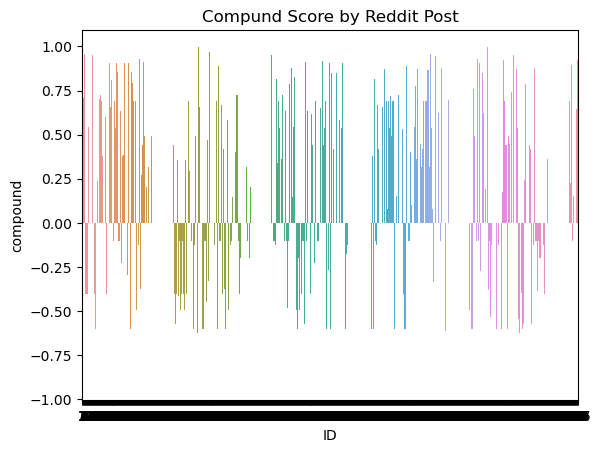

In [258]:
ax = sns.barplot(data=vaders, x='ID', y='compound')
ax.set_title('Compund Score by Reddit Post')
plt.show()

This section creates a bar plot depicting the compound sentiment scores for each Reddit post.

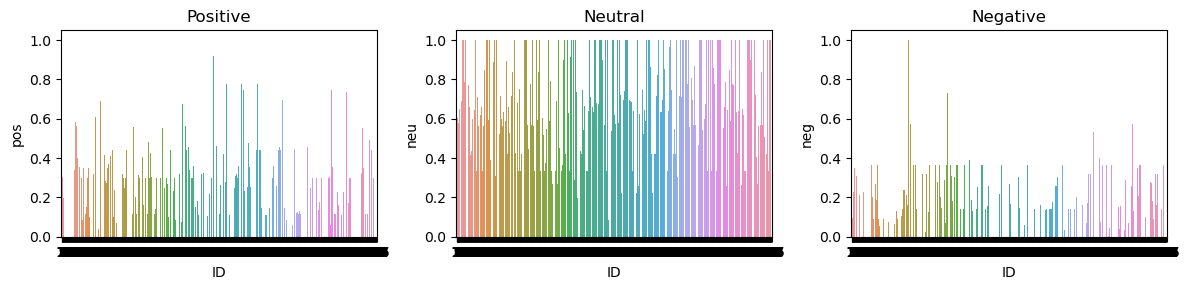

In [249]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='ID', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='ID', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='ID', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In this part, three subplots are created, each representing positive, neutral, and negative sentiment scores.

These visualizations provide a comprehensive overview of sentiment scores for each Reddit post, with separate plots for compound, positive, neutral, and negative sentiments.

## 4. Results Visualization:

* Matplotlib and Seaborn are used to present the sentiment analysis results in various visualizations, including bar plots for compound sentiment scores and distribution of positive, neutral, and negative sentiments.

### Compound Sentiment Scores Bar Plot


This plot specifically visualizes the compound sentiment scores for each Reddit post, allowing for a quick overview of the overall sentiment polarity. Adjustments to the plot size, labels, or additional styling can be made based on specific preferences or presentation requirements.

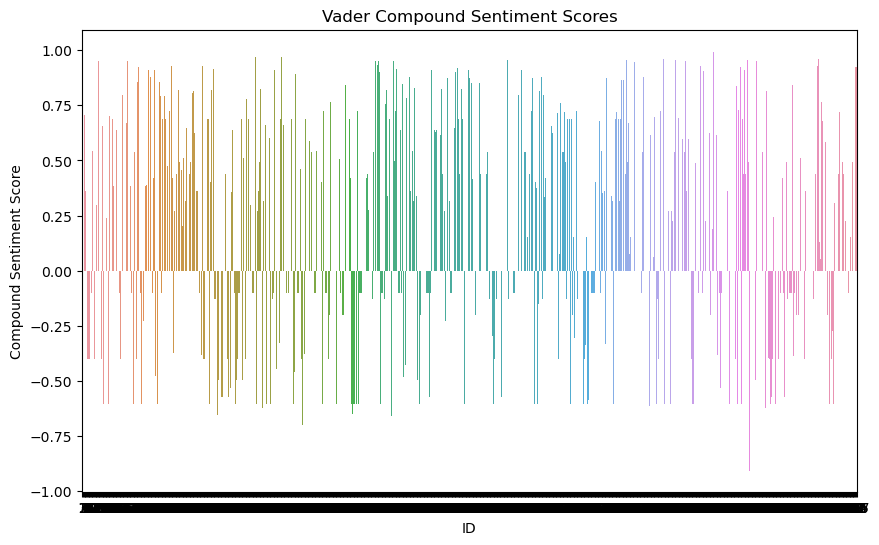

In [251]:
# Create a bar plot for compound sentiment scores
plt.figure(figsize=(10, 6))
sns.barplot(x='ID', y='compound', data=vaders)
plt.title('Vader Compound Sentiment Scores')
plt.xlabel('ID')
plt.ylabel('Compound Sentiment Score')
plt.show()


## Word Cloud Analysis 
This presents a visual exploration of sentiments expressed in Reddit comments using word clouds. Word clouds are generated for positive, negative, and neutral sentiments, providing an intuitive representation of the most frequently occurring words within each sentiment category. The size of each word in the cloud corresponds to its frequency in the text. Explore these visualizations to gain insights into the key themes and sentiments prevalent in the Reddit community discussions.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


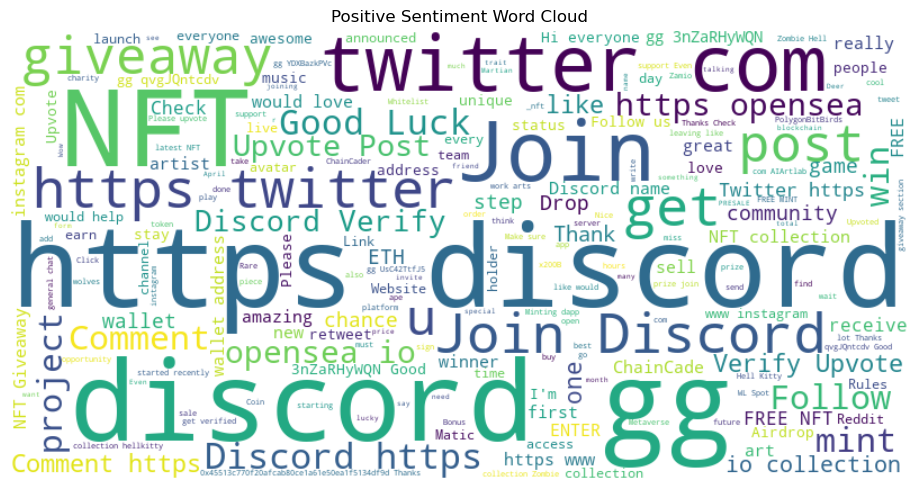

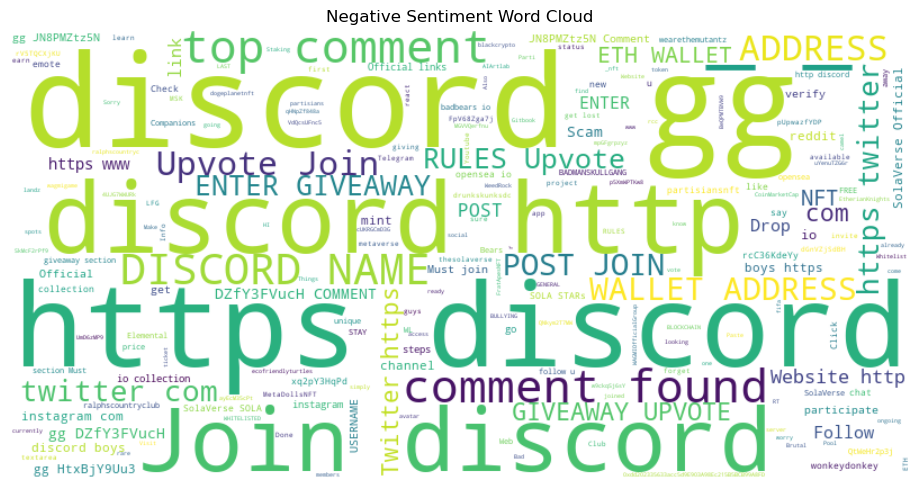

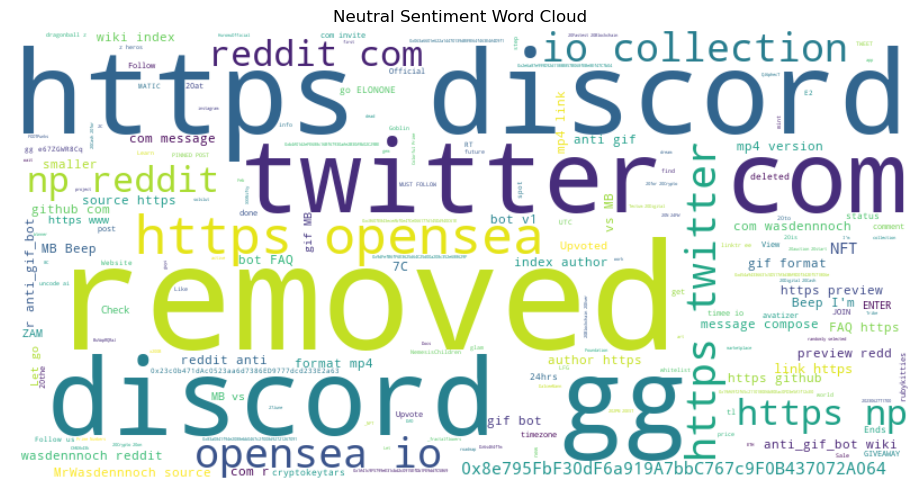

In [260]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Download English stopwords from NLTK
nltk.download('stopwords')

# Function to generate and display word cloud
def generate_word_cloud(text, title):
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Assuming you have positive_text, negative_text, and neutral_text defined
# Generate and display word clouds for positive, negative, and neutral sentiments
generate_word_cloud(positive_text, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_text, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_text, 'Neutral Sentiment Word Cloud')


## Correlation Heatmap
This heatmap will display the correlation coefficients between negative, neutral, positive, and compound sentiment scores. Positive values indicate a positive correlation, while negative values indicate a negative correlation. The heatmap provides a quick overview of how strongly different sentiment scores are related to each other. 

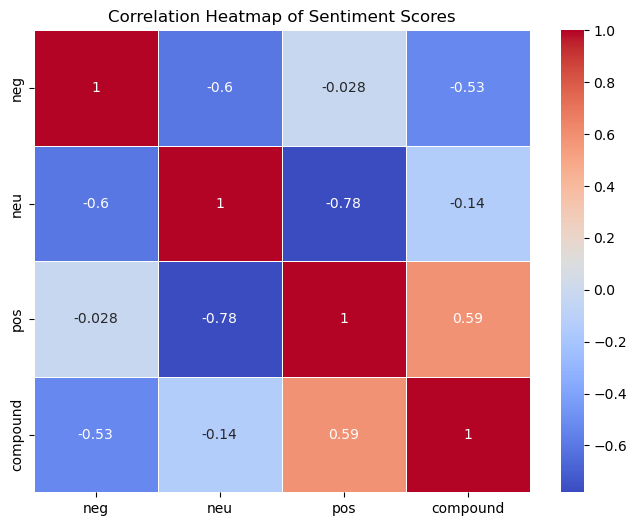

In [268]:
# Correlation heatmap for sentiment scores
correlation_matrix = vaders[['neg', 'neu', 'pos', 'compound']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Sentiment Scores')
plt.show()


### Positive, Neutral, Negative Sentiments Distribution


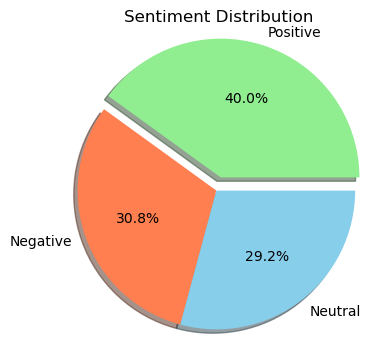

In [262]:
# Categorize sentiments into Positive, Negative, and Neutral
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

vaders['Sentiment'] = vaders['compound'].apply(categorize_sentiment)

# Create a pie chart
sentiment_counts = vaders['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['lightgreen', 'coral', 'skyblue']
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


**These visualizations provide insights into the sentiment distribution across the dataset.**

The project successfully conducted sentiment analysis on the Reddit posts, providing valuable insights into the sentiment distribution across the dataset. Visualizations facilitated the interpretation of sentiment scores, allowing for a better understanding of the overall sentiment landscape.

The pie chart, in particular, summarized the sentiment distribution, showcasing the percentage of positive, negative, and neutral sentiments. This information is crucial for understanding community sentiments and can be beneficial for various applications, including market analysis and community engagement strategies.



# Project Conclusion: Sentiment Analysis of Reddit Posts

## Overview
In this comprehensive sentiment analysis project, we explored the sentiments expressed in a dataset of Reddit posts related to Non-Fungible Tokens (NFTs). The project involved a multi-step process, starting from data collection to advanced natural language processing (NLP) techniques and insightful visualizations.

## Data Processing and Cleaning
The initial phase included thorough data processing and cleaning. We employed the NLTK library to handle missing values, remove unwanted characters, and prepare the text data for sentiment analysis. Tasks such as removing emojis, punctuation, and stopwords were crucial to enhance the quality of the text data.

## VADER Sentiment Scoring
The sentiment analysis was performed using VADER (Valence Aware Dictionary and sEntiment Reasoner), a powerful pre-built sentiment analysis tool in the NLTK library. This involved using NLTK's SentimentIntensityAnalyzer to obtain negative, neutral, and positive scores, as well as an overall compound score for each post.

## Data Visualization
To visually represent the sentiment analysis results, we utilized Matplotlib and Seaborn to create compelling visualizations. Bar plots showcased compound sentiment scores, while a pie chart summarized the distribution of sentiments across the dataset.

## Word Clouds
In addition to quantitative analyses, we leveraged word clouds to provide an intuitive representation of the most frequent words associated with positive, negative, and neutral sentiments. This added a qualitative dimension to our exploration of sentiment trends.

## Conclusion
This project serves as a comprehensive exploration of sentiment analysis techniques applied to Reddit posts, specifically within the NFT market context. By integrating data processing, sentiment scoring, and visualization, we gained valuable insights into the sentiment landscape of the dataset. These findings contribute to a deeper understanding of sentiment trends in the NFT-related discussions on Reddit.
In summary, the sentiment analysis project effectively applied natural language processing techniques to derive actionable insights from Reddit posts, providing a comprehensive understanding of the sentiments expressed in the dataset.

**Project Key Takeaways:**
- Application of NLP techniques for data preprocessing.
- Utilization of VADER for sentiment scoring.
- Visualization of sentiment scores using Matplotlib and Seaborn.
- Integration of word clouds for intuitive representation of sentiment-associated words.

This project not only showcases the technical proficiency in NLP and sentiment analysis but also highlights the potential for extracting meaningful insights from unstructured text data in online communities.

